## 4 - Data Analysis and Visualization

In [1]:
# Importing necessary libraries for data analysis and visualizations
import os
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Missing values and Outliers

In [2]:
data_missing = {
    'Feature': [88
        'Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1', 'Current_J2', 'Temperature_J2',
        'Current_J3', 'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5',
        'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5', 'Tool Current'
    ],
    'Missing Percentage (%)': [
        0.620867, 0.728843, 0.728843, 0.728843, 0.728843, 0.728843,
        0.728843, 0.728843, 0.728843, 0.728843, 0.728843, 0.728843,
        0.728843, 0.728843, 0.728843, 0.728843, 0.728843, 0.728843, 0.728843
    ]
}

In [3]:
data_outliers = {
    'Feature': [
        'Current_J0', 'Current_J1', 'Current_J2', 'Current_J3', 'Current_J4', 'Current_J5',
        'Speed_J0', 'Speed_J1', 'Speed_J3', 'Speed_J4', 'Speed_J5'
    ],
    'Outlier Percentage (%)': [
        2.82089, 2.09205, 2.14604, 2.65893, 2.60494, 0.161965,
        3.2663, 2.3485, 2.05156, 3.33378, 2.20003
    ]
}


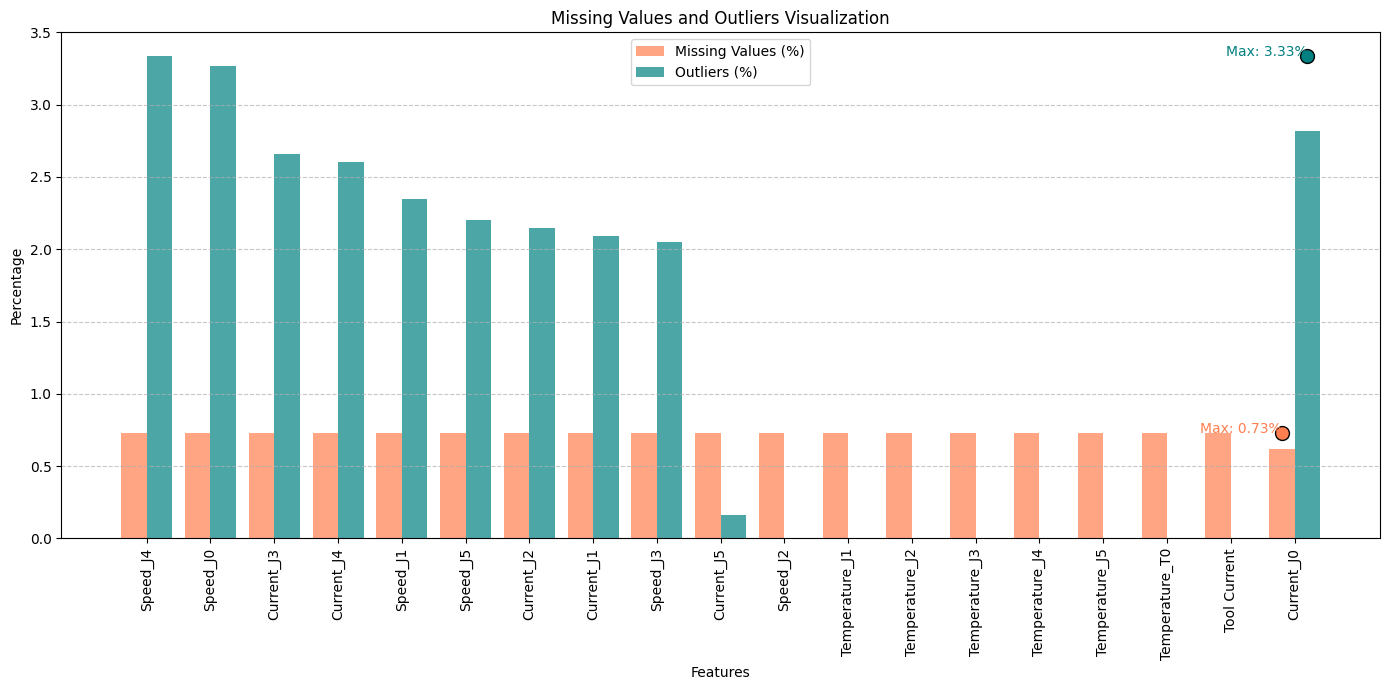

In [4]:
df_missing = pd.DataFrame(data_missing)
df_outliers = pd.DataFrame(data_outliers)

df_combined = pd.merge(df_missing, df_outliers, on='Feature', how='outer').fillna(0)

plt.figure(figsize=(14, 7))
bar_width = 0.4

df_combined = df_combined.sort_values(by=['Missing Percentage (%)', 'Outlier Percentage (%)'], ascending=False)
x = range(len(df_combined['Feature']))

plt.bar(x, df_combined['Missing Percentage (%)'], width=bar_width, label='Missing Values (%)', alpha=0.7, color='coral')
plt.bar([i + bar_width for i in x], df_combined['Outlier Percentage (%)'], width=bar_width, label='Outliers (%)', alpha=0.7, color='teal')

max_missing = df_combined['Missing Percentage (%)'].max()
max_outlier = df_combined['Outlier Percentage (%)'].max()
plt.scatter(len(df_combined['Feature']) - 1, max_missing, color='coral', s=100, edgecolors='black')
plt.scatter(len(df_combined['Feature']) - 1 + bar_width, max_outlier, color='teal', s=100, edgecolors='black')
plt.text(len(df_combined['Feature']) - 1, max_missing, f'Max: {max_missing:.2f}%', ha='right', color='coral')
plt.text(len(df_combined['Feature']) - 1 + bar_width, max_outlier, f'Max: {max_outlier:.2f}%', ha='right', color='teal')

plt.xlabel('Features')
plt.ylabel('Percentage')
plt.title('Missing Values and Outliers Visualization')
plt.xticks([i + bar_width / 2 for i in x], df_combined['Feature'], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#### Average Cycle Time

In [5]:
# Loading the cycle summary dataset
data = utils.load_data("data/processed/cycle_summary.csv", "csv")

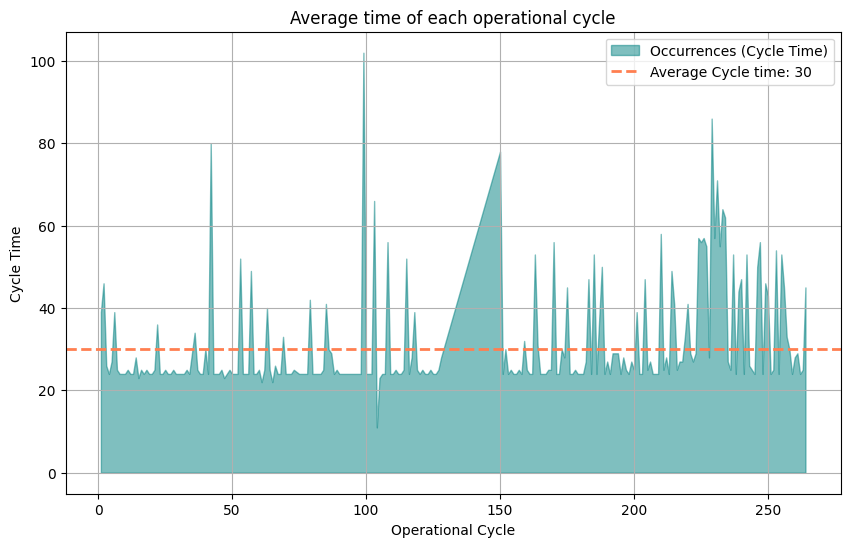

In [6]:
average_cycle_time = int(data['occurrences'].mean())
data = data[data['occurrences'] >= 0]

plt.figure(figsize=(10, 6))
plt.fill_between(data['Cycle'], data['occurrences'], color='#008080', alpha=0.5, label='Occurrences (Cycle Time)')
plt.axhline(y=average_cycle_time, color='#FF7F50', linestyle='--', linewidth=2, label=f'Average Cycle time: {average_cycle_time}')
plt.title('Average time of each operational cycle')
plt.xlabel('Operational Cycle')
plt.ylabel('Cycle Time')
plt.legend()
plt.grid(True)
plt.show()